# Линейный классификатор. Логистическая регрессия

Используем реализацию классификатора на основе [логистической регрессии](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression) в `scikit-learn` [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)

In [21]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# базовые метрики классификации
from sklearn.metrics import accuracy_score, f1_score, auc, class_likelihood_ratios
# ROC-curve, AUC
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
# Precision-recall
from sklearn.metrics import precision_recall_curve, average_precision_score, PrecisionRecallDisplay

import matplotlib.pyplot as plt

# Не показывать FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Импорт и подготовка данных

In [22]:
df = pd.read_csv('./datasets/loanapp.csv')
df = df.dropna()

In [24]:
y = df['approve']
X = df.drop(columns=['approve','reject', 'action'])
# Разобьём выборку на обучающую и тестовую 80:20
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

## Инициализация и обучение модели 

In [25]:
clf = LogisticRegression(penalty=None, random_state=0)
clf.fit(X_train, y_train)

/Users/artamonov/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(penalty=None, random_state=0)

параметра (веса) обученной модели

In [26]:
# веса при признаках
clf.coef_

array([[-6.14282423e-05, -1.95406630e-02,  1.84422728e-03,
        -3.94204057e-04,  1.26265679e-03,  5.04977789e-03,
        -5.06248941e-04,  1.71881623e-04, -4.24346134e-04,
         2.88782040e-05, -3.87698883e-06, -1.94758264e-04,
        -3.75732015e-05, -2.61495521e-05, -1.08885961e-04,
         4.49669601e-03, -6.76261505e-03,  3.01363758e-06,
        -1.86739880e-04,  3.63075690e-03,  1.89982563e-03,
        -3.82919358e-04, -3.78700854e-03, -5.44305048e-04,
        -4.93356848e-03, -1.11281459e-02, -9.22284259e-06,
        -3.27864427e-05,  1.45082727e-02, -5.16763168e-04,
         2.48422777e-04, -2.98140044e-04,  5.87386879e-05,
        -5.83632481e-06, -6.01704565e-04, -6.95620902e-05,
        -1.71342884e-04, -8.67890143e-04, -3.21221856e-04,
        -4.15773433e-05,  4.21526925e-04, -2.68546018e-04,
        -2.99646831e-04,  6.75096591e-05, -5.88004986e-04,
        -9.37593705e-05,  3.99010788e-05,  2.72868019e-04,
        -1.83905191e-04, -6.12877909e-05, -2.60284056e-0

In [27]:
# константа w0
clf.intercept_

array([1.6466315e-06])

## Прогнозирование (на тестовой выборке)

In [28]:
# прогноз на тестовой выборке
clf.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [29]:
# прогноз вероятностей на тестовой выборке
clf.predict_proba(X_test)

array([[1.54389213e-01, 8.45610787e-01],
       [7.02572359e-02, 9.29742764e-01],
       [1.76446783e-01, 8.23553217e-01],
       [1.81605164e-01, 8.18394836e-01],
       [3.48373510e-01, 6.51626490e-01],
       [1.66152117e-01, 8.33847883e-01],
       [2.49973683e-01, 7.50026317e-01],
       [6.45921262e-02, 9.35407874e-01],
       [1.49204358e-01, 8.50795642e-01],
       [1.50685249e-01, 8.49314751e-01],
       [2.11158587e-01, 7.88841413e-01],
       [1.44089603e-01, 8.55910397e-01],
       [1.03521822e-01, 8.96478178e-01],
       [1.42052115e-01, 8.57947885e-01],
       [1.81134883e-01, 8.18865117e-01],
       [7.90582838e-02, 9.20941716e-01],
       [2.69663619e-02, 9.73033638e-01],
       [1.95384633e-01, 8.04615367e-01],
       [1.10992250e-01, 8.89007750e-01],
       [2.16672503e-01, 7.83327497e-01],
       [1.31426483e-02, 9.86857352e-01],
       [1.11407687e-01, 8.88592313e-01],
       [6.06725694e-02, 9.39327431e-01],
       [7.88026325e-02, 9.21197368e-01],
       [1.351643

## Метрики качестве прогнозов на тестовой выборке

In [30]:
# доля правильных прогнозов на тестовой выборке
clf.score(X_test, y_test)

0.8651685393258427

In [31]:
# альтернативно: метод accuracy_score
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8651685393258427

In [32]:
# метрика F1
f1_score(y_test, y_pred)

np.float64(0.9274924471299094)

In [33]:
# Метрика AUC-ROC
y_pred_prob = clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve (y_test, y_pred_prob)

roc_auc_score (y_test, y_pred_prob)

np.float64(0.701389350528485)

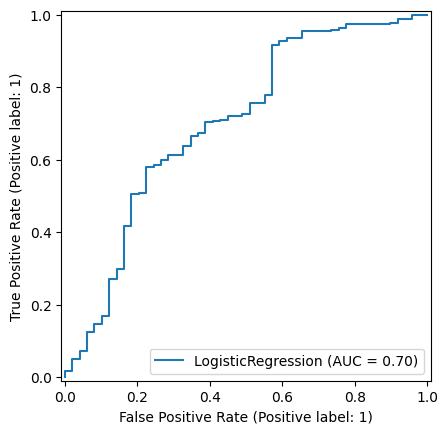

In [34]:
RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.show()

In [35]:
# метрика AUC-PR
y_pred_prob = clf.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
auc(recall, precision)

np.float64(0.9176261991133686)

In [36]:
y_pred_prob = clf.predict_proba(X_test)[:,1]
average_precision_score(y_test, y_pred_prob)

np.float64(0.9181795422715255)

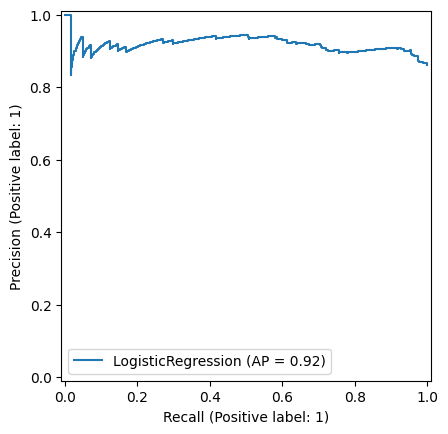

In [37]:
PrecisionRecallDisplay.from_estimator(clf, X_test, y_test)
plt.show()

## Сравнение нескольких классификаторов

In [40]:
# Другой классификатор: логистическая регрессия со штрафом l2
clf2 = LogisticRegression(penalty='l2', random_state=0)
clf2.fit(X_train, y_train)

# Другой классификатор: логистическая регрессия со штрафом l1
clf3 = LogisticRegression(penalty='l1', random_state=0, solver='liblinear')
clf3.fit(X_train, y_train)

# Другой классификатор: логистическая регрессия со штрафом l2 и с=2
clf4 = LogisticRegression(penalty='l2', random_state=0, C=2)
clf4.fit(X_train, y_train)

/Users/artamonov/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/artamonov/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/artamonov/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    h

LogisticRegression(C=2, random_state=0)

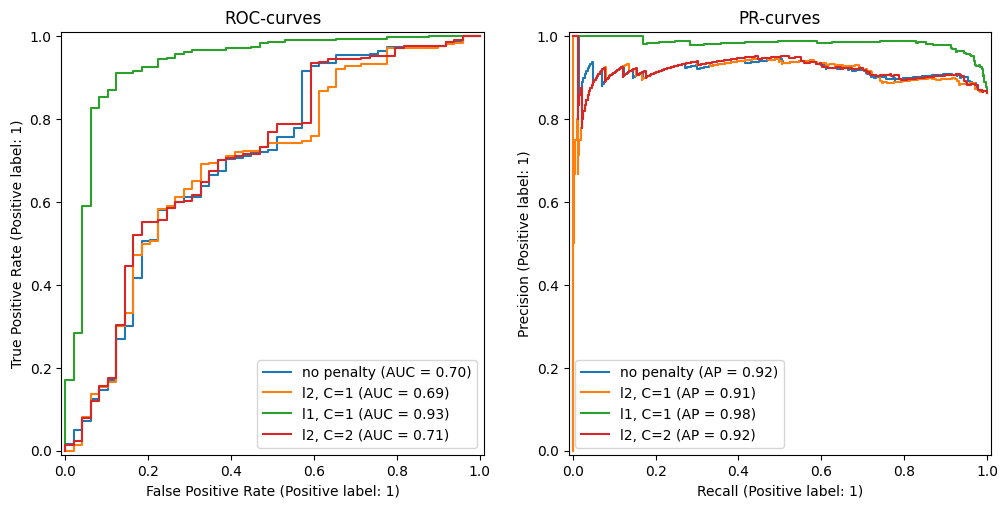

In [39]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=axs[0], name='no penalty')
RocCurveDisplay.from_estimator(clf2, X_test, y_test, ax=axs[0], name='l2, C=1')
RocCurveDisplay.from_estimator(clf3, X_test, y_test, ax=axs[0], name='l1, C=1')
RocCurveDisplay.from_estimator(clf4, X_test, y_test, ax=axs[0], name='l2, C=2')

PrecisionRecallDisplay.from_estimator(clf, X_test, y_test, ax=axs[1], name='no penalty')
PrecisionRecallDisplay.from_estimator(clf2, X_test, y_test, ax=axs[1], name='l2, C=1')
PrecisionRecallDisplay.from_estimator(clf3, X_test, y_test, ax=axs[1], name='l1, C=1')
PrecisionRecallDisplay.from_estimator(clf4, X_test, y_test, ax=axs[1], name='l2, C=2')

axs[0].set_title('ROC-curves')
axs[1].set_title('PR-curves')

plt.show()